# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

We are going to look at why states like Colorado and Illinois shifted so dramatically from the ACT to the SAT.
We have seen remarkable increase in participation in states like Colorado and Illionis where the College Board won bids for the standardized college entrance exam for the state. The goal of this project is to find what factors made those two states successful and target other states that may result in official state adoption of the SAT and near 100% participation in future years.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

- Data Collection and Munging:
    - The data raw data we were dealing with were subtest and composite/total scores as well as  the participation rate for the SAT 2017, SAT 2018 and ACT 2017 tests. For the ACT 2018 test we only had access to the composite and participation data.
-   Cleaning this data involved removing data rows that were not included in each test (i.e. the ACT test had a 'National' average entry), as well as removing data compilation errors like duplicated rows, mistyped values, etc. These tables were indexed and joined on the `State` column.

- Exploratory Data Analysis:
    - In exploring the data it was clear that Illinois and Colorado were outliers in the participation growth of the SAT.

| State | act_growth | sat_growth |
|Illinois|-53.76|1000.00|
|Colorado|-70.00|809.09|
|West Virginia|-5.797101|100.00|
|Arkansas|0.00|66.67|
|Ohio|33.33|50.00|
 
- I decided to take a look at all states with a SAT participation growth rate 50% or over between 2017 and 2018. Creating a heatmap with only  these  states, I was able to find strong correlations and focus my search on other states with the same features.

![](./images/heatmap_sat_growth_50_perc.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns

In [2]:
# import jtplot submodule from jupyterthemes
# from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style()

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

> **_ACT 2017:_** The ACT 2017 data includes a State (object), Participation (object), English Average Scores (int64), Math Average Scores (int64), Reading Average Scores (int64), Science Average Scores (int64) and the Average Composite scores (object). All 50 states are represented as well as the District of Columbia and a National row. Some participations are remarkably high (100%) which seems unlikely.
>
> **_SAT 2017:_**  The SAT 2017 data includes a State (object), Participation (object), Reading and Writing Average Scores (int64), Math Average Scores (int64) and the Average Total scores (int64). All 50 states are represented as well as the District of Columbia. Some participations are remarkably high (100%) which seems unlikely.

#### 4a. Does the data look complete? 

In [6]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [7]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

> **_Answer:_** The amount of participation seems a little too varied. To have states with 100% participation and some as low as 3% seem like there is something incomplete about the data. But their are no null values. At this point in the analysis, the data seems complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

##### **_Answer:_** 
> **_ACT error search:_**
 - The range of ACT scores  is between 1 and 36.
    - These scores are compiled and averaged and each subtest has the same range.
    - [Reference for ACT scoring](https://magoosh.com/hs/act/2019/act-scores/)

In [8]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


> - ACT _max_ and _min_ scores fall in range for each test. Though the composite score is not included here because it is stored as an object.

In [9]:
# We will attempt to convert the column to float and check the max and min values.
try:
    act_2017['Composite'].astype(float).describe()
except Exception as e:
    print(e)

could not convert string to float: '20.2x'


In [10]:
# From above, we see there is an ValueError in converting the string value '20.2x' to a float.
# Let's find that row.
act_2017[act_2017['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


> **_Error in ACT 2017 Composite Column:_** 
- Wyoming's Composite score has had an $x$ on the end of it.
- By checking the source data [here](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), we can see that Wyoming's score should be 20.2.
- Since there is a bad value in the Composite column, for the  purposes of this quick  check, I am going to find the max and min values of the column by sorting them to check that they are within range.

In [11]:
# A quick check shows the values are sorted as expected. 
# i.e. Alphabetical sorting is corresponding to  numerical sorting.
act_2017.sort_values('Composite');

In [12]:
comp_min = act_2017.sort_values('Composite').head(1).values[0][-1]
comp_max = act_2017.sort_values('Composite').tail(1).values[0][-1]
print(f'Min: {comp_min}')
print(f'Max: {comp_max}')
print("The ACT max and min scores fall within range.")

Min: 17.8
Max: 25.5
The ACT max and min scores fall within range.


> **_ACT 2017 Participation Column:_** 
- We will also want to check out _Participation_ percentages. They should fall between 0% and 100%.

In [13]:
# act_2017.sort_values('Participation');

> - **_Sorting Value Error:_** Sorting by values does not order them numerically. I did a line by line inspection and found that there were  no negative values and nothing a bove 100%.
    - I will use a string method to convert the values and confirm.

In [14]:
act_2017['Participation'].str[:-1].astype(float).describe()

count     52.000000
mean      65.153846
std       31.832518
min        8.000000
25%       31.000000
50%       68.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64

> - By removing the % symbol from the column, I can convert them to floats and confirm my visual inspection.
>
> - The ACT _Participation_ scores fall within range.

> **_SAT Error Search:_**
- The range of SAT scores for 2018 is between 400 and 1600.
    - 200 - 800 for each subtest.
    - [Reference for SAT scoring](https://blog.prepscholar.com/what-is-a-good-sat-score-a-bad-sat-score-an-excellent-sat-score)

In [15]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


> **_SAT 2017 Math Error:_** 
- The SAT scores description shows that at least one state has a Math score that is below the possible range  of SAT scores.

In [16]:
sat_2017.sort_values('Math').head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996


> - By sorting the scores by the Math column, we can see that the problem state is Maryland  with a Math score of 52. 
> - By checking the source data [here](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) we can see that the actual average Math score for Maryland in 2017 was 524.

> **_SAT 2017 Participation Scores:_** 
- Finally we will confirm the _Participation_ column like we did for the ACT.

In [17]:
act_2017['Participation'].str[:-1].astype(float).describe()

count     52.000000
mean      65.153846
std       31.832518
min        8.000000
25%       31.000000
50%       68.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64

> - The scores fall within  range.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
# ACT 2017: Wyoming index is 51 and its composite score should be '20.2'.
# We will leae the score as a string for now.
act_2017.loc[[51],'Composite'] = '20.2'
act_2017.loc[[51],:]; # Check for permanence

# SAT 2017: Maryland index is 20 and we are fixing the Math column.
sat_2017.loc[[20], 'Math'] = 524
sat_2017.loc[[20], :];  # Check for permanence

#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [20]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

> **_Data Type Errors:_**  
- **ACT 2017:** 
    - The _Composite_ score is stored as an object due to Wyoming's record error.
    - The _Participation_ column is stored as an object because of the $\%$ symbol.
- **SAT 2017:** 
    - The _Participation_ column is stored as an object because of the $\%$ symbol in the  SAT table as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

> **_Convert Participation to Numeric Type:_** 

In [21]:
def convert_string(score):
    '''
    This function is used in the following `fix_participation` function. 
    It converts percentages stored as string into numeric types.
    '''
    
    if score[-1] == '%':
        return float(score[:-1])
    else:
        return float(score)

In [22]:
def convert_string_to_float(df,column='Participation'):
    ''''
    This function receives a data frame and a column by name to construct a series (default is the `'Participation'` column).
    If the series is already type `'float64'` the function will print a message saying so.
    If not, the `fix_participation` will cut off the last character and convert the series to type 'float64'.
    This function is intended to convert percentages stored as objects (strings) into numerical values (float64). 
    '''
    
    # df (pandas.DataFrame): The dataframe to define the series to check (and convert) data types.
    # column (str): Column name of the data frame to find the correct series.
    
    # Confirm that column provided is in the data frame. 
    # If not, through an error along with valid column names.
    try:
        df[column]
    except KeyError:
        print(f'Column {column} does not exist in dataframe.')
        print('Try one of these:')
        print(df.columns)
        return
    
    # Store initial data type for checking and printing.
    type_initial = df[column].dtype
    
    # Check that initial data type is object.
    if type_initial == 'object':
        df[column] = df[column].apply(convert_string)
        print(f"Data frame column: '{column}' converted from type {type_initial} to type {df[column].dtype}")
    else:
        print(f"Data frame column: '{column}' is already type {type_initial}.")

In [23]:
convert_string_to_float(sat_2017)
convert_string_to_float(act_2017)

Data frame column: 'Participation' converted from type object to type float64
Data frame column: 'Participation' converted from type object to type float64


- Fix any individual values preventing other columns from being the appropriate type.

> **_Convert ACT 2017 Composite column:_** We have already fixed the _"bad"_ value in the ACT 2017 dataframe, so we can go ahead and convert the column.

In [24]:
float(act_2017[act_2017['State'] == 'Wyoming'].values[0][-1])

20.2

In [25]:
# act_2017['Composite'] = act_2017['Composite'].astype(float)
convert_string_to_float(act_2017, column='Composite')

Data frame column: 'Composite' converted from type object to type float64


- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [26]:
print(act_2017.dtypes)
print()
print(sat_2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [27]:
def standardize_cols(df,prefix):
    df.columns = ['state' if col.lower() == 'State'.lower() \
        else prefix + 'reading_writing' \
                  if (col.lower() == 'Evidence-Based Reading and Writing'.lower()) \
                  and (col[:len(prefix)] != prefix)
        else prefix + col.lower().replace('-','_').replace(' ','_') \
                  if (col[:len(prefix)] != prefix) \
        else col
                  for col in df.columns \
                 ]
    return df.columns

In [28]:
standardize_cols(act_2017,'ACT_2017_')

Index(['state', 'ACT_2017_participation', 'ACT_2017_english', 'ACT_2017_math',
       'ACT_2017_reading', 'ACT_2017_science', 'ACT_2017_composite'],
      dtype='object')

In [29]:
standardize_cols(sat_2017,'SAT_2017_')

# print(act_2017.info())
# print()
# print(sat_2017.info())

Index(['state', 'SAT_2017_participation', 'SAT_2017_reading_writing',
       'SAT_2017_math', 'SAT_2017_total'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|string|ACT|State from which the ACT data is colllected.|
|ACT_2017_participation|float|ACT|The percentage of high-school students in each state that participated in the SAT.|
|ACT_2017_english|float|ACT|The average score on the English section of the ACT.|
|ACT_2017_math|float|ACT|The average score on the Math section of the ACT.|
|ACT_2017_reading|float|ACT|The average score on the Reading section of the ACT.|
|ACT_2017_science|float|ACT|The average score on the Science section of the ACT.|
|ACT_2017_composite|float|ACT|The average composite score from all sections of the ACT.|
|state|string|SAT|State from which the SAT data is colllected.|
|sat_participation|float|SAT|The percentage of high-school students in each state that participated in the SAT.|
|SAT_2017_reading_writing|integer|SAT|The average score on the "Evidence Based Reading and Writing" section of the SAT.|
|SAT_2017_math|integer|SAT|The average score of the Math section of the SAT.
|SAT_2017_total|integer|SAT|The average total score of the SAT per state.


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
[state for state in act_2017['state'].values if state not in sat_2017['state'].values]

['National']

> **_Dealing with Unnecessary Rows:_** Using the list comprehension above we can that `act_2017` has an extra state: 'National'. We will deal with this row below.

> **_Joining the Tables:_** I am going to use a property of 'inner' joining to remove  any  extra rows in the two tables. I am going to use the 'state' column in both dataframes to  join the dataframes together. If we do an inner join, any states from the `left data frame` that do not have a corresponding state in the `right data frame` will be excluded.
- To make sure that there is no joining errors, I am going to convert each state to its `title` format.

In [31]:
act_2017['state'] = act_2017['state'].apply(lambda state: state.title())
sat_2017['state'] = sat_2017['state'].apply(lambda state: state.title())
# act_2017.set_index('state').join(sat_2017.set_index('state'),how='inner').shape

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [32]:
combined = act_2017.set_index('state').join(sat_2017.set_index('state'),how='inner')

In [33]:
print(act_2017.shape, sat_2017.shape, combined.shape)
print(combined.index);

(52, 7) (51, 5) (51, 10)
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')


In [34]:
combined.head()

,ACT_2017_participation,ACT_2017_english,ACT_2017_math,ACT_2017_reading,ACT_2017_science,ACT_2017_composite,SAT_2017_participation,SAT_2017_reading_writing,SAT_2017_math,SAT_2017_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


> **_Merging and Joining ACT 2017 and SAT 2017:_** 
- Notice that the shape combined table matches  what we would expect. when we look at the list of states (now the index), we see that 'National' has been dropped.

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [35]:
combined.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

> **_Importing and Cleaning 2018:_** 
- The data is actually provided for us in the data folder already. We will import it using `pd.read_csv()` and clean it like we did  the data above.
- I will be joining the data based on the `'State'` columns again, so I will make those the index column now, using a converter dictionary to ensure they are all title cased.

In [36]:
sat_2018 = pd.read_csv('../data/sat_2018.csv',
                       index_col='State',
                       converters={
                           'State':lambda state: state.title()
                       }
                      )
act_2018 = pd.read_csv('../data/act_2018.csv',
                       index_col='State',
                       converters={
                           'State':lambda state: state.title()
                       }
                      )
sat_2018.info(), act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 2 columns):
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


(None, None)

> **_Cleaning Data and Standardizing Columns:_** 
- We can see that the data type of both Participation columns are still objects. We will convert them  using the function `convert_string_to_float` defined previously.

In [37]:
# Convert the participation columns to numeric columns.
convert_string_to_float(act_2018,'Participation')
convert_string_to_float(sat_2018)

Data frame column: 'Participation' converted from type object to type float64
Data frame column: 'Participation' converted from type object to type float64


In [38]:
print(act_2018['Participation'].dtype)
print(sat_2018['Participation'].dtype)

float64
float64


> - Next we will standardize the columns to remove spaces special characters and make the headers a little more descriptive and clear.

In [39]:
print(standardize_cols(act_2018,'ACT_2018_'))
print(standardize_cols(sat_2018,'SAT_2018_'))

Index(['ACT_2018_participation', 'ACT_2018_composite'], dtype='object')
Index(['SAT_2018_participation', 'SAT_2018_reading_writing', 'SAT_2018_math',
       'SAT_2018_total'],
      dtype='object')


In [40]:
act_2018.loc['Maine']

,ACT_2018_participation,ACT_2018_composite
State,,
Maine,7.0,24.0
Maine,7.0,24.0


In [41]:
sat_2018.shape

(51, 4)

> - **Note** that the column header `'State'` has not been lowercased since it is the name of the index.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

> **_Unnecessary and Missing Rows:_**
- We can see from the `.info()` output of the data tables that we are missing all of the ACT 2018 subtest scores. I have not been able to find the subtest score breakdown online, and it would be interesting to see on another iteration of this  project, how test scores have changed from one year to the next.
    - A resource describing the percentage of students that have met the "benchmark" for each ACT  subtest can be found [here](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf).
- We can also see that ACT 2018 has one more row than the SAT table. It is likely to be the `'National'` averages row like ACT 2017.  But we will check to confirm.

In [42]:
# act_2018.loc['National']; # Throws a KeyError: 'National'
# Will do a value_count check on the Index to find any duplicates.
act_2018[act_2018.index.value_counts() > 1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,ACT_2018_participation,ACT_2018_composite
State,,
Maine,7.0,24.0
Maine,7.0,24.0


In [43]:
# # It appears we have a duplicate value for the 'Maine' row. .reset_index().loc[mask_ME]
# act_2018.reset_index(inplace=True)
# act_2018.drop_duplicates(subset='State',keep='first',inplace=True)
# act_2018.set_index('State',inplace=True)
# act_2018.index.value_counts()

- I had planned to remove any extra rows by joining the tables, assuming that the extra would have been unneccessary.

In [44]:
scores = pd.read_csv('../data/combined_2017.csv',index_col='state').join(sat_2018,how='inner').join(act_2018,how='inner')

In [45]:
scores.shape

(52, 16)

> - I assumed the duplicated value was from a `'National'` row like we had in the ACT 2017 data, but since it is still there after the join, I am going to check for duplicate data.

In [46]:
# We have a duplicated 'Maine' row.
scores.index.value_counts()

Maine                   2
Connecticut             1
Minnesota               1
Hawaii                  1
Rhode Island            1
Alabama                 1
Maryland                1
Illinois                1
Colorado                1
Wyoming                 1
District Of Columbia    1
New Jersey              1
Pennsylvania            1
Nevada                  1
Georgia                 1
Massachusetts           1
Texas                   1
Oklahoma                1
Indiana                 1
Nebraska                1
West Virginia           1
Kentucky                1
Alaska                  1
New Mexico              1
Michigan                1
North Dakota            1
Virginia                1
North Carolina          1
Kansas                  1
Washington              1
Wisconsin               1
Florida                 1
Arkansas                1
Montana                 1
Tennessee               1
Mississippi             1
Idaho                   1
Utah                    1
Oregon      

In [47]:
# The index is duplicated, I will run the  following to  check if the values are all the same.
scores[scores.duplicated()]

,ACT_2017_participation,ACT_2017_english,ACT_2017_math,ACT_2017_reading,ACT_2017_science,ACT_2017_composite,SAT_2017_participation,SAT_2017_reading_writing,SAT_2017_math,SAT_2017_total,SAT_2018_participation,SAT_2018_reading_writing,SAT_2018_math,SAT_2018_total,ACT_2018_participation,ACT_2018_composite
Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012,99.0,512,501,1013,7.0,24.0


In [48]:
# Since the data is a complete duplicate, I will drop the duplicate rows, keeping the first row.
scores.drop_duplicates(keep='first',
                       inplace=True)

In [49]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 16 columns):
ACT_2017_participation      51 non-null float64
ACT_2017_english            51 non-null float64
ACT_2017_math               51 non-null float64
ACT_2017_reading            51 non-null float64
ACT_2017_science            51 non-null float64
ACT_2017_composite          51 non-null float64
SAT_2017_participation      51 non-null float64
SAT_2017_reading_writing    51 non-null int64
SAT_2017_math               51 non-null int64
SAT_2017_total              51 non-null int64
SAT_2018_participation      51 non-null float64
SAT_2018_reading_writing    51 non-null int64
SAT_2018_math               51 non-null int64
SAT_2018_total              51 non-null int64
ACT_2018_participation      51 non-null float64
ACT_2018_composite          51 non-null float64
dtypes: float64(10), int64(6)
memory usage: 6.8+ KB


In [50]:
# The final data table looks good, so we will save it to the csv.
scores.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [51]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
ACT_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT_2017_science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
ACT_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
SAT_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
SAT_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
SAT_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
SAT_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [52]:
def find_sigma(column,df=scores):
    '''
    `find_sigma` will take in a series and return sigma: the standard deviation for the series.
    If the column passed does not refer to a numerical series, it will throw an error.
    '''
    # column (str): is the column name of a series in the dataframe provided.
    # df (pandas.DataFrame): is the dataframe that houses the series provided.
            # # Default value for this project is `scores`.
    # ser (pandas.Series): is the column name of a seriesin the dataframe provided.
    # n (int): is the lengh of the series(as in the formula above)
    # m (float): is the mean value of the series (represented by the greek letter mu in the formula above).
    #  diff_list (list): is the list of squared differences between each element of the series and the series mean
    
    ser = df[column]
    
    #  function will stop running if the data type of the series is not numerical.
    if ser.dtype not in ['float64','int64']:
        print('This series is an object data type.')
        return False
    
    n = ser.count()
    m = ser.mean()
    
    diff_list = [(x - m)**2 for x in ser]
    sigma = ((1/(n)) * sum(diff_list))**0.5
    
    return sigma

In [53]:
for col in scores.columns.values:
    print(f"{col}: {find_sigma(col)}")

ACT_2017_participation: 31.824175751231806
ACT_2017_english: 2.3304876369363363
ACT_2017_math: 1.9624620273436781
ACT_2017_reading: 2.0469029314842646
ACT_2017_science: 3.1511078954644076
ACT_2017_composite: 2.000786081581989
SAT_2017_participation: 34.92907076664508
SAT_2017_reading_writing: 45.21697020437866
SAT_2017_math: 46.65713364485503
SAT_2017_total: 91.58351056778743
SAT_2018_participation: 36.946619223539415
SAT_2018_reading_writing: 47.03460978357609
SAT_2018_math: 47.30194550378352
SAT_2018_total: 93.22742384464433
ACT_2018_participation: 33.70173582041031
ACT_2018_composite: 2.090779082141178


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [54]:
std_dict = {col:find_sigma(col) for col in scores.columns if find_sigma(col)}

In [55]:
std_dict

{'ACT_2017_participation': 31.824175751231806,
 'ACT_2017_english': 2.3304876369363363,
 'ACT_2017_math': 1.9624620273436781,
 'ACT_2017_reading': 2.0469029314842646,
 'ACT_2017_science': 3.1511078954644076,
 'ACT_2017_composite': 2.000786081581989,
 'SAT_2017_participation': 34.92907076664508,
 'SAT_2017_reading_writing': 45.21697020437866,
 'SAT_2017_math': 46.65713364485503,
 'SAT_2017_total': 91.58351056778743,
 'SAT_2018_participation': 36.946619223539415,
 'SAT_2018_reading_writing': 47.03460978357609,
 'SAT_2018_math': 47.30194550378352,
 'SAT_2018_total': 93.22742384464433,
 'ACT_2018_participation': 33.70173582041031,
 'ACT_2018_composite': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [56]:
find_sigma('ACT_2017_composite')

2.000786081581989

In [57]:
scores['ACT_2017_composite'].std()

2.020694891154341

In [58]:
np.std(scores['ACT_2017_composite'])

2.000786081581989

> **_Standard Deviation ~deviations~:_** My formula matches numpy's standard deviation result but not pandas'.
- The formula given for the standard deviation above was for a population standard deviation (which does not apply here, since we are not dealing with an entire population). 
- According to this [link](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) the correct formula for a sample standard deviation (the default for pandas) is: 
>
> $$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i - \mu)^2}$$

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?   
    - 2017 ACT?
    - 2018 ACT?

In [59]:
def grab_states_agg(column,func_list=[np.min, np.max]):
    for aggfunc in func_list:
        agg_score = scores[column].agg(aggfunc)
        print(f"{column.replace('_',' ')}: {agg_score} score: {list(scores[scores[column] == agg_score].index.values)}")
    print("  --  ")

In [60]:
for column_name in [col for col in scores.columns if 'participation' in col]:
    grab_states_agg(column_name)

ACT 2017 participation: 8.0 score: ['Maine']
ACT 2017 participation: 100.0 score: ['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
  --  
SAT 2017 participation: 2.0 score: ['Iowa', 'Mississippi', 'North Dakota']
SAT 2017 participation: 100.0 score: ['Connecticut', 'Delaware', 'District Of Columbia', 'Michigan']
  --  
SAT 2018 participation: 2.0 score: ['North Dakota']
SAT 2018 participation: 100.0 score: ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']
  --  
ACT 2018 participation: 7.0 score: ['Maine']
ACT 2018 participation: 100.0 score: ['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
  --  


- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
 

In [61]:
for column_name in [col for col in scores.columns if ('composite' in col or 'total' in col)]:
    grab_states_agg(column_name)

ACT 2017 composite: 17.8 score: ['Nevada']
ACT 2017 composite: 25.5 score: ['New Hampshire']
  --  
SAT 2017 total: 950 score: ['District Of Columbia']
SAT 2017 total: 1295 score: ['Minnesota']
  --  
SAT 2018 total: 977 score: ['District Of Columbia']
SAT 2018 total: 1298 score: ['Minnesota']
  --  
ACT 2018 composite: 17.7 score: ['Nevada']
ACT 2018 composite: 25.6 score: ['Connecticut']
  --  


- Do any states with 100% participation on a given test have a rate change year-to-year?

In [62]:
part_100_ACT = (scores['ACT_2017_participation']==100) 
scores.loc[part_100_ACT,['ACT_2017_participation','ACT_2018_participation','SAT_2017_participation','SAT_2018_participation']]

,ACT_2017_participation,ACT_2018_participation,SAT_2017_participation,SAT_2018_participation
Alabama,100.0,100.0,5.0,6.0
Arkansas,100.0,100.0,3.0,5.0
Colorado,100.0,30.0,11.0,100.0
Kentucky,100.0,100.0,4.0,4.0
Louisiana,100.0,100.0,4.0,4.0
Minnesota,100.0,99.0,3.0,4.0
Mississippi,100.0,100.0,2.0,3.0
Missouri,100.0,100.0,3.0,4.0
Montana,100.0,100.0,10.0,10.0
Nevada,100.0,100.0,26.0,23.0


> **_Significant Changes:_** 
-  Colorado has a drastic 70% drop in participation in the ACT from 2017 to 2018.
    - Colorado had a significant 88% increase in participation in the SAT.

In [63]:
part_100_SAT = (scores['SAT_2017_participation']==100) 
scores.loc[part_100_SAT,['SAT_2017_participation','SAT_2018_participation','ACT_2017_participation','ACT_2018_participation']]

,SAT_2017_participation,SAT_2018_participation,ACT_2017_participation,ACT_2018_participation
Connecticut,100.0,100.0,31.0,26.0
Delaware,100.0,100.0,18.0,17.0
District Of Columbia,100.0,92.0,32.0,32.0
Michigan,100.0,100.0,29.0,22.0


> **_No Significant Changes:_** There doesn't seem to be any significant drop in SAT participation from 2017 to 2018 amongst full participation states.

In [64]:
scores['sat_growth'] = 100*(scores['SAT_2018_participation'] - scores['SAT_2017_participation'])/scores['SAT_2017_participation'].astype(int)
scores['act_growth'] = 100*(scores['ACT_2018_participation'] - scores['ACT_2017_participation'])/scores['ACT_2017_participation'].astype(int)
scores[['act_growth','sat_growth']].sort_values(by='sat_growth')

,act_growth,sat_growth
Florida,-9.589041,-32.530120
Nevada,0.000000,-11.538462
District Of Columbia,0.000000,-8.000000
Arizona,6.451613,-3.333333
Wyoming,0.000000,0.000000
North Dakota,0.000000,0.000000
New Hampshire,-11.111111,0.000000
Nebraska,19.047619,0.000000
Montana,0.000000,0.000000
Wisconsin,0.000000,0.000000


- Do any states show have >50% participation on *both* tests either year?

In [65]:
part_2017 = ['ACT_2017_participation','SAT_2017_participation']
scores[(scores[part_2017[0]] > 50) & (scores[part_2017[1]] > 50)][part_2017]

,ACT_2017_participation,SAT_2017_participation
Florida,73.0,83.0
Georgia,55.0,61.0
Hawaii,90.0,55.0


In [66]:
part_2018 = ['ACT_2018_participation','SAT_2018_participation']
scores[(scores[part_2018[0]] > 50) & (scores[part_2018[1]] > 50)][part_2018]

,ACT_2018_participation,SAT_2018_participation
Florida,66.0,56.0
Georgia,53.0,70.0
Hawaii,89.0,56.0
North Carolina,100.0,52.0
South Carolina,100.0,55.0


Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

> **_States of Interest:_** 
- **Colorado** had a significant swing from the ACT to the SAT.
- **Illinois** also had a significant swing to the SAT.
- **Florida** has a high participation in both ACT and SAT (73% and 83% respectively) and had a negative growth in participation for both tests.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [67]:
sort_cols = scores.columns.sort_values()

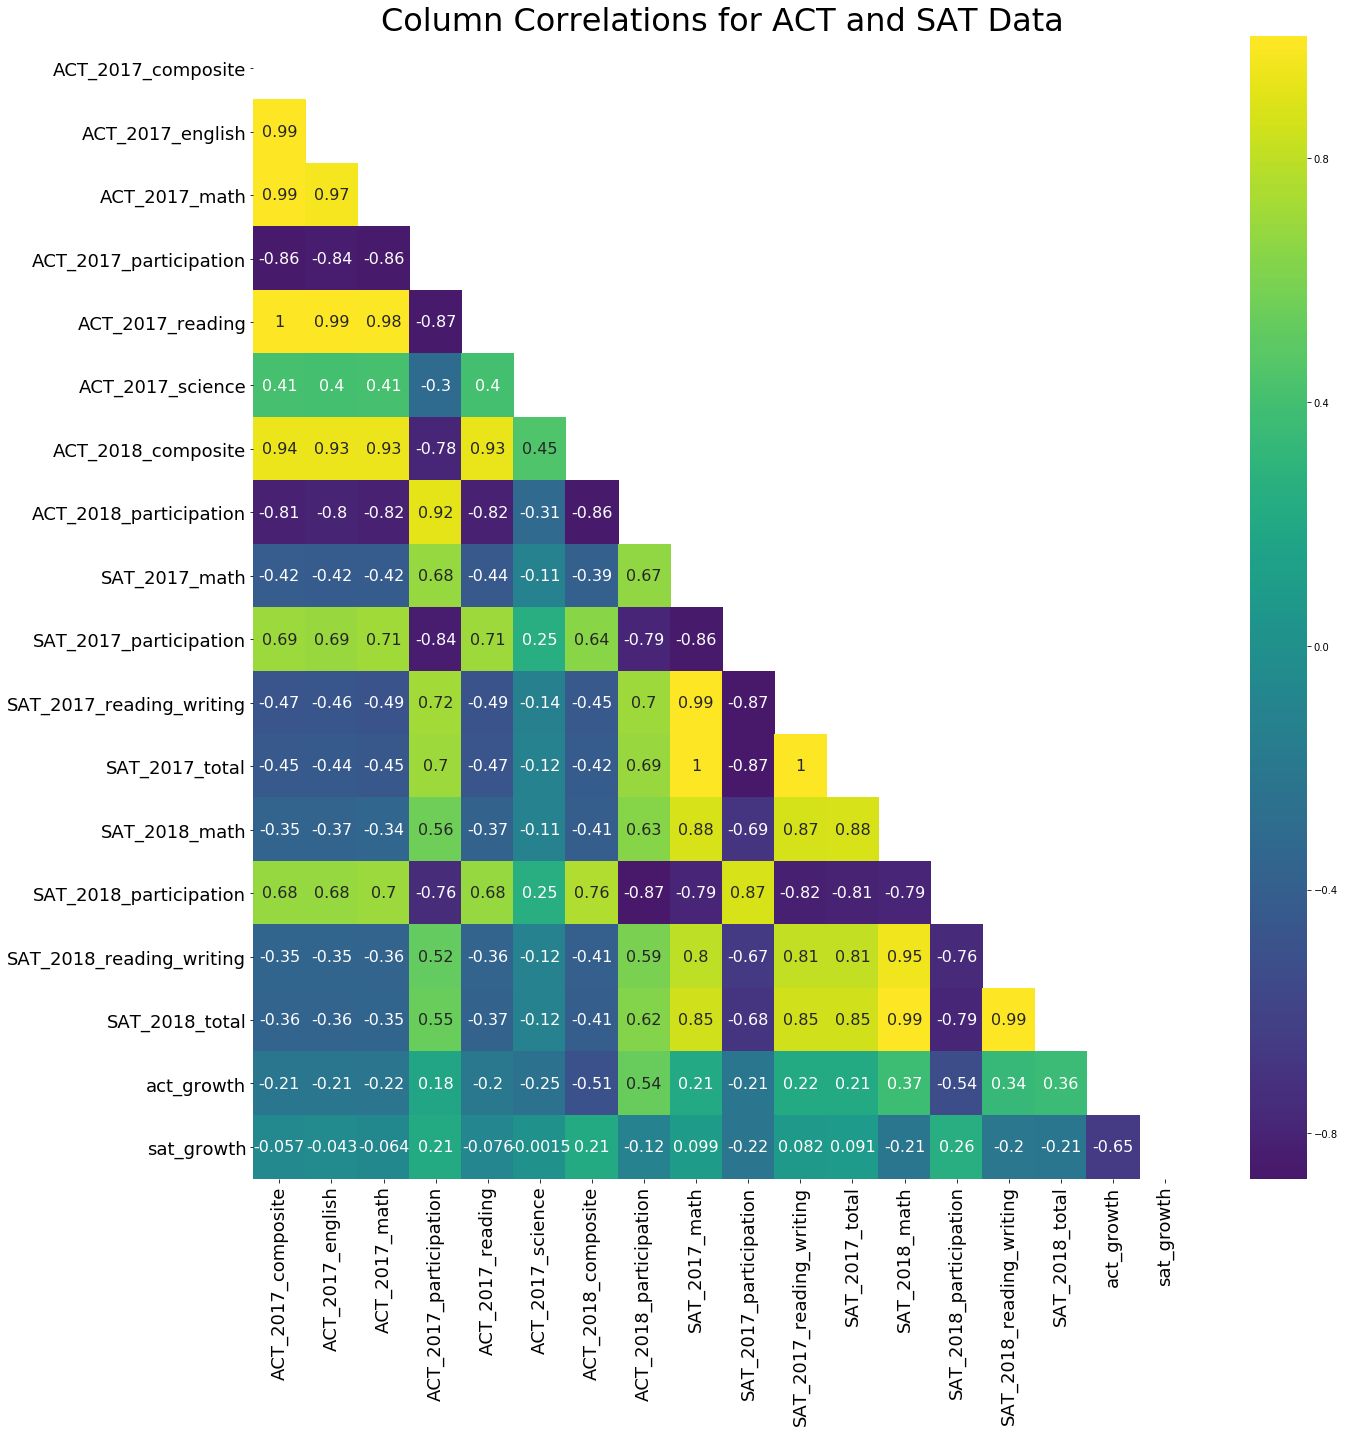

In [70]:
mask = np.zeros_like(scores.corr(), dtype=np.bool);
mask[np.triu_indices_from(mask)] = True;
plt.figure(figsize=(20,20));
sns.heatmap(scores[sort_cols].corr(),
            mask=mask,
            annot=True,
            annot_kws={
                "fontsize":16
            },
            cmap='viridis',
            center=0
           );
plt.title("Column Correlations for ACT and SAT Data",size=32);
plt.yticks(size=18);
plt.xticks(size=18);
plt.tight_layout();

In [71]:
scores[scores['sat_growth'] > 50][['act_growth','sat_growth','ACT_2017_participation','ACT_2018_participation','SAT_2017_participation','SAT_2018_participation']].sort_values(by='SAT_2018_participation',ascending=False).head(15)#.index

,act_growth,sat_growth,ACT_2017_participation,ACT_2018_participation,SAT_2017_participation,SAT_2018_participation
Colorado,-70.000000,809.090909,100.0,30.0,11.0,100.0
Illinois,-53.763441,1000.000000,93.0,43.0,9.0,99.0
West Virginia,-5.797101,100.000000,69.0,65.0,14.0,28.0
Arkansas,0.000000,66.666667,100.0,100.0,3.0,5.0


/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


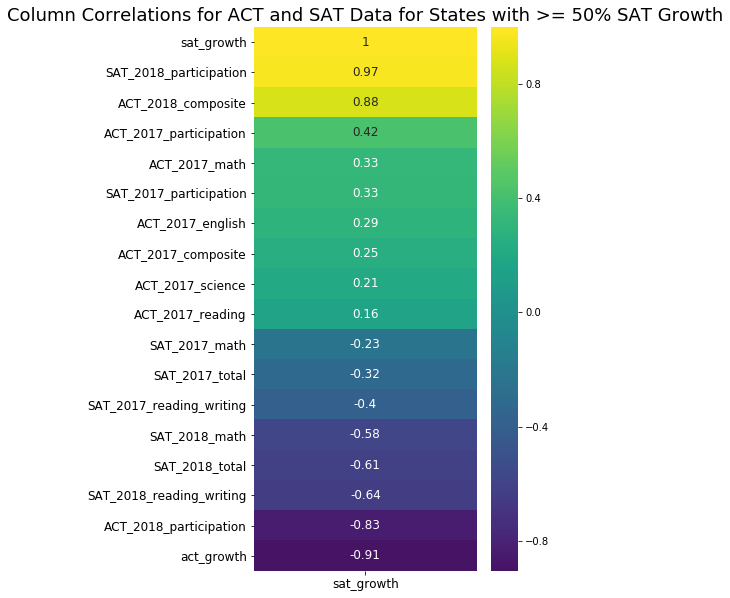

In [72]:
# mask = np.zeros_like(scores.corr(), dtype=np.bool);
states = ['Illinois', 'Colorado', 'West Virginia', 'Arkansas', 'Ohio','Mississippi', 'Iowa']
# mask[np.triu_indices_from(mask)] = True;
plt.figure(figsize=(5,10));
sns.heatmap(scores[sort_cols].loc[states,:].corr()[['sat_growth']].sort_values(by='sat_growth',ascending=False),
#             mask=mask,
            annot=True,
            annot_kws={
                "fontsize":12
            },
            cmap='viridis',
            center=0,
           );
plt.title("Column Correlations for ACT and SAT Data for States with >= 50% SAT Growth",size=18);
plt.yticks(size=12);
plt.xticks(size=12);
plt.tight_layout();

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


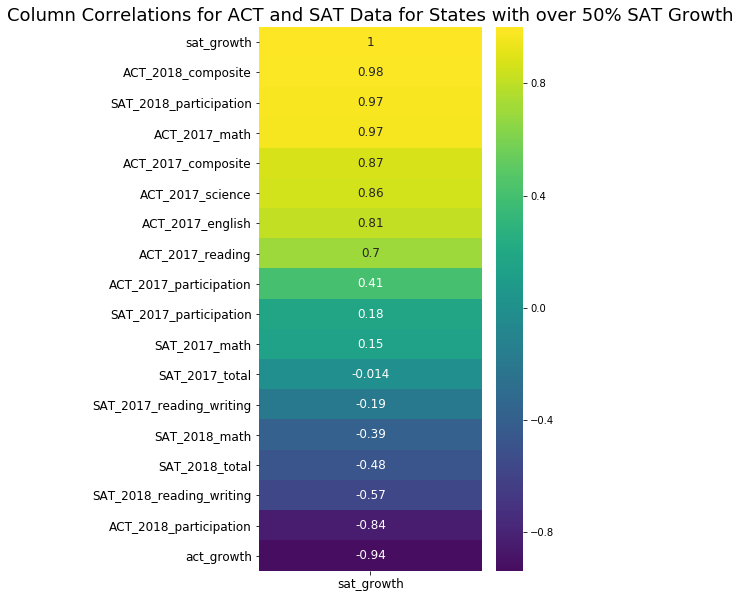

In [74]:
# mask = np.zeros_like(scores.corr(), dtype=np.bool);
states = ['Illinois', 
          'Colorado', 
          'West Virginia', 
          'Arkansas'#, 
#           'Ohio',
#           'Mississippi', 
#           'Iowa'
         ]
# states = scores.index.values
# mask[np.triu_indices_from(mask)] = True;
plt.figure(figsize=(5,10));
sns.heatmap(scores[sort_cols].loc[states,:].corr()[['sat_growth']].sort_values(by='sat_growth',ascending=False),
#             mask=mask,
            annot=True,
            annot_kws={
                "fontsize":12
            },
            cmap='viridis',
            center=0,
           );
plt.title("Column Correlations for ACT and SAT Data for States with over 50% SAT Growth",size=18);
plt.yticks(size=12);
plt.xticks(size=12);
plt.tight_layout();

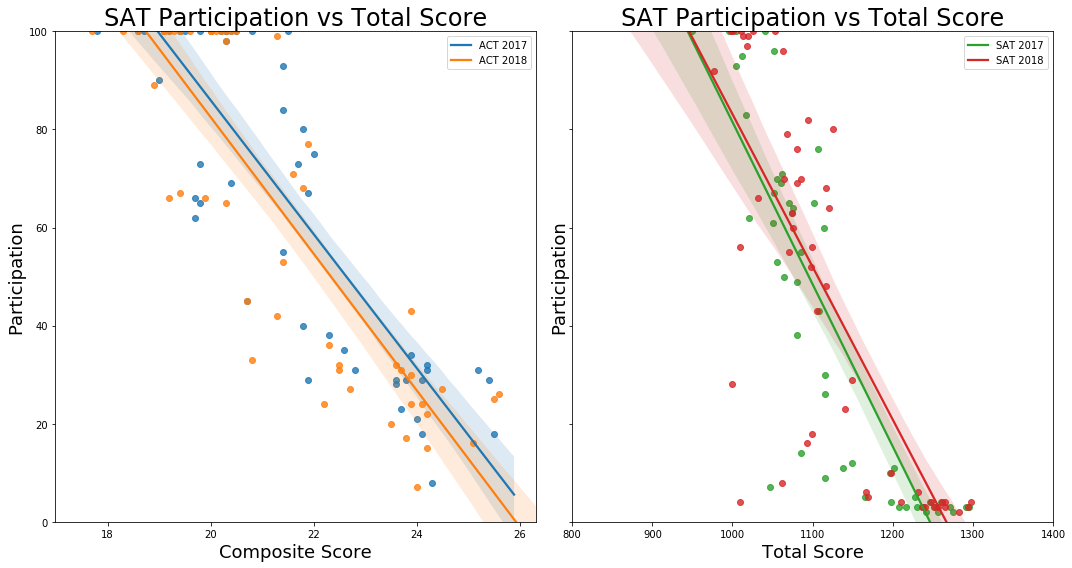

In [76]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(15,8))
# fig.figure(figsize=(10,8))
ax.ravel()    
for cols in [['ACT_2017_composite','ACT_2017_participation'],['ACT_2018_composite','ACT_2018_participation']]:
    df=scores
    x_col = cols[0]
    y_col = cols[1]
    sns.regplot(x=df[x_col],
                y=df[y_col],
                ax=ax[0]
    )
    ax[0].set_ylim(0,100)
    ax[0].set_xlabel('Composite Score',size=18)
    ax[0].set_ylabel('Participation',size=18)
    ax[0].set_title('SAT Participation vs Total Score',size=24)
    ax[0].legend(['ACT 2017','ACT 2018'])
for cols in [['SAT_2017_total','SAT_2017_participation'],['SAT_2018_total','SAT_2018_participation']]:
    df=scores
    x_col = cols[0]
    y_col = cols[1]
    sns.regplot(x=df[x_col],
                y=df[y_col],
                ax=ax[1]
    )
    ax[1].set_xlim(800,1400)
    ax[1].set_xlabel('Total Score',size=18)
    ax[1].set_ylabel('Participation',size=18)
    ax[1].set_title('SAT Participation vs Total Score',size=24)
    ax[1].legend(['SAT 2017','SAT 2018'])
plt.tight_layout()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [80]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    plt.figure(figsize=(20,8))
    colors = ['red','orange','blue','green']
    nrows = int(np.ceil(len(list_of_columns)/2))             # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,8))             # You'll want to specify your figsize
    ax = ax.ravel()                                          # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):             # Gives us an index value to get into all our lists
        ax_mean = round(dataframe[column].mean(),1)
        ax[i].hist(dataframe[column],color=colors[i])                        # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(x=ax_mean
                      ,color=colors[i])
        ax[i].text(x=ax_mean*0.50,
                   y=ax[i].get_ylim()[1]*0.9,
                   s=f"mean: {ax_mean}"#,
#                    rotation=90,
#                    color=colors[i]
                  )
    plt.tight_layout()                                       # Set titles, labels, etc here for each subplot


In [81]:
# def subplot_scatter(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     plt.figure(figsize=(20,8))
#     colors = ['red','orange','blue','green']
#     nrows = int(np.ceil(len(list_of_columns)/2))             # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,8))             # You'll want to specify your figsize
#     ax = ax.ravel()                                          # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns):             # Gives us an index value to get into all our lists
#         ax_mean = round(dataframe[column].mean(),1)
#         ax[i].scatter(dataframe[column],color=colors[i])                        # feel free to add more settings
#         ax[i].set_title(list_of_titles[i])
#         ax[i].set_xlabel(list_of_xlabels[i])
#         ax[i].axvline(x=ax_mean
#                       ,color=colors[i])
#         ax[i].text(x=ax_mean*0.50,
#                    y=ax[i].get_ylim()[1]*0.9,
#                    s=f"mean: {ax_mean}"#,
# #                    rotation=90,
# #                    color=colors[i]
#                   )
#     plt.tight_layout()                                       # Set titles, labels, etc here for each subplot


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<Figure size 1440x576 with 0 Axes>

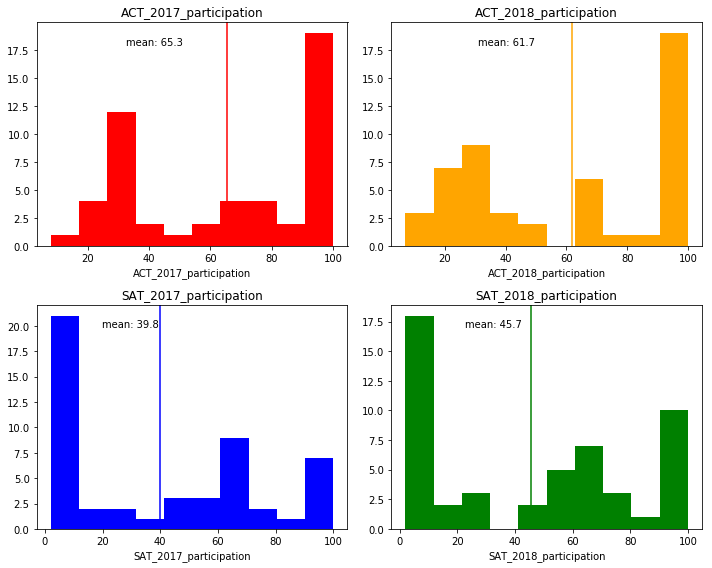

In [83]:
# Participation rates for SAT & ACT
col_list = sorted([col for col in scores.columns if 'participation' in col])
subplot_histograms(scores, col_list, col_list, col_list);

<Figure size 1440x576 with 0 Axes>

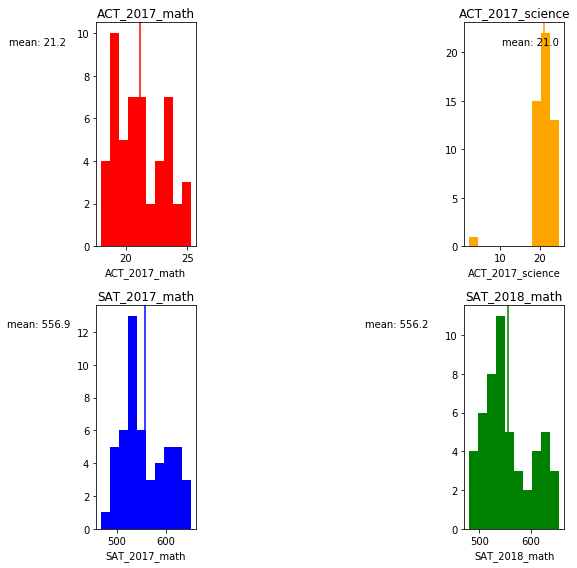

In [85]:
# Math scores for SAT & ACT
col_list = sorted([col for col in scores.columns if ('math' in col) or ('science' in col)])
subplot_histograms(scores, col_list, col_list, col_list);

<Figure size 1440x576 with 0 Axes>

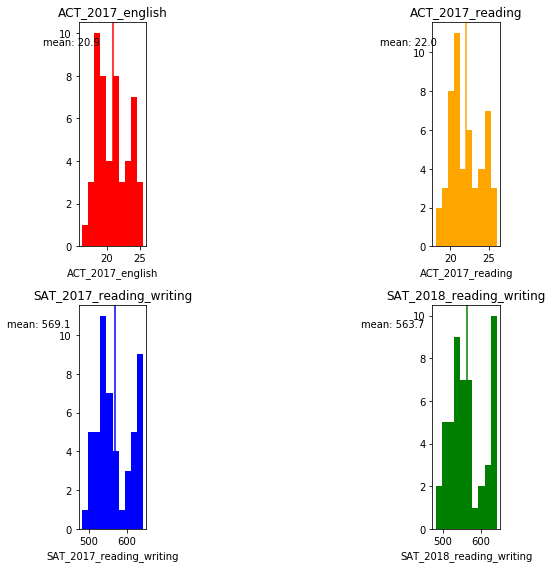

In [86]:
# Reading/verbal scores for SAT & ACT
col_list = sorted([col for col in scores.columns if ('read' in col) or ('english' in col)])
subplot_histograms(scores, col_list, col_list, col_list);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [103]:
def create_scatter(cols,df=scores):
    plt.figure(figsize=(10,8))
    x_lbl= ' '.join([' '.join(col.split('_')[:2]) + ' ' + ' '.join([subj.title() for subj in col.split('_')[2:]]) for col in cols])
    y_lbl= ' '.join([' '.join(col.split('_')[:2]) + ' ' + ' '.join([subj.title() for subj in col.split('_')[2:]]) for col in cols])
    plt.title(f"{y_lbl} vs. {x_lbl}")
    print(x_lbl+' Scores')
    plt.xlabel(x_lbl+' Scores')
    plt.ylabel(y_lbl+' Scores')
    sns.regplot(x=cols[1],
                y=cols[0],
                data=df
               )
    plt.legend([x_lbl.split(' ')[1] for _ in range(2)])
    print(f"Correlation between {x_lbl} and {y_lbl} is: {df[cols].corr().values[0][1]}")
#     plt.title(list_of_cols[1].replace("_"," ").title() + " vs. " + list_of_cols[0].replace("_"," ").title())


In [104]:
sorted(scores.columns);

SAT 2017 Math ACT 2017 Math Scores
Correlation between SAT 2017 Math ACT 2017 Math and SAT 2017 Math ACT 2017 Math is: -0.42045603931931763


('SAT 2017 Math', 'ACT 2017 Math')

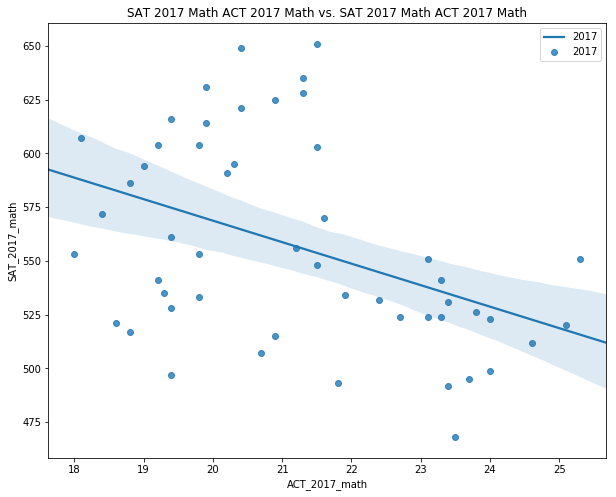

In [105]:
col_list = [['SAT_2017_math','ACT_2017_math'],
            ['SAT_2017_reading_writing','ACT_2017_reading'],
            ['SAT_2017_total','ACT_2017_composite'],
            ['SAT_2018_total','SAT_2017_total'],
            ['ACT_2018_composite','ACT_2017_composite'],
            ['sat_growth','act_growth']]
x,y = [' '.join(col.split('_')[:2]) + ' ' + ' '.join([subj.title() for subj in col.split('_')[2:]]) for col in col_list[0]]
create_scatter(col_list[0]);
x,y

> **_Analysis:_** Oddly enough, there doesn't seem to be a strong correlation between performance on the SAT and the  ACT  math sections. The correlation value is -0.42. 

SAT 2017 Math Scores
Correlation between SAT 2017 Math and ACT 2017 Math is: -0.4884406005231993


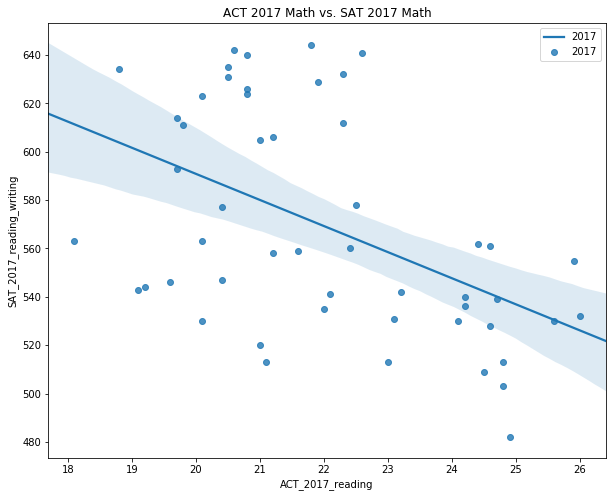

In [90]:
create_scatter(col_list[1]);

> **_Analysis:_** There is also weak negative correlation between the ACT's Reading subtest and the SAT's Reading and Writing section. Corr = -0.48

SAT 2017 Math Scores
Correlation between SAT 2017 Math and ACT 2017 Math is: -0.44502018509994357


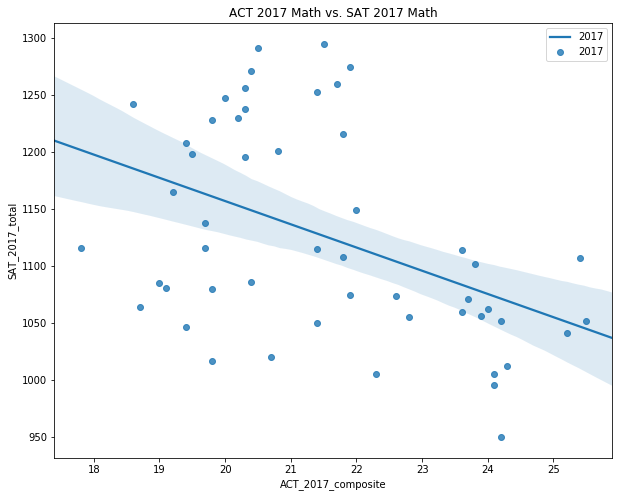

In [91]:
create_scatter(col_list[2]);

> **_Analysis:_** There is also weak negative correlation between the ACT's Reading subtest and the SAT's Reading and Writing section. Corr = -0.48

SAT 2017 Math Scores
Correlation between SAT 2017 Math and ACT 2017 Math is: 0.85272709563914


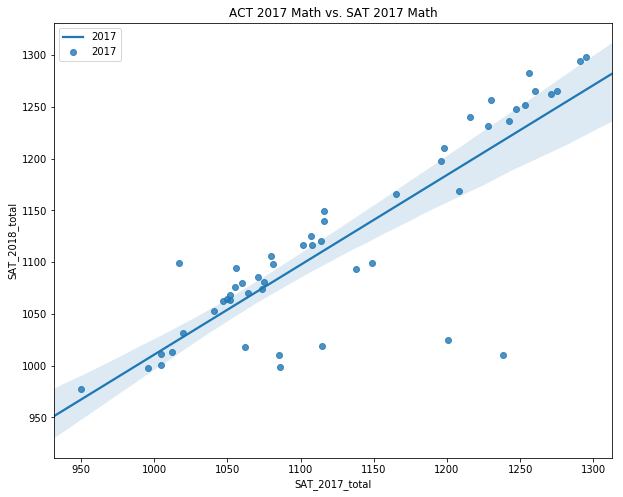

In [92]:
create_scatter(col_list[3]);

> **_Analysis:_** There is also weak negative correlation between the ACT's Reading subtest and the SAT's Reading and Writing section. Corr = -0.48

In [ ]:
create_scatter(col_list[4]);

> **_Analysis:_** There is also weak negative correlation between the ACT's Reading subtest and the SAT's Reading and Writing section. Corr = -0.48

In [ ]:
create_scatter(col_list[5]);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
scores.columns.sort_values()

In [ ]:
sns.boxplot(
    data=scores[['SAT_2017_math','SAT_2017_reading_writing','SAT_2018_math', 'SAT_2018_reading_writing']],
    orient='h')
plt.tight_layout()

In [ ]:
sns.boxplot(data=scores[['SAT_2017_total', 'SAT_2018_total']],orient='h')
plt.tight_layout()

In [ ]:
sns.boxplot(data=scores[['ACT_2017_composite', 'ACT_2018_composite']],orient='h')
plt.tight_layout()

In [ ]:
sns.boxplot(data=scores[['ACT_2017_composite', 'ACT_2017_english', 'ACT_2017_math',
       'ACT_2017_reading', 'ACT_2017_science',
       'ACT_2018_composite']],orient='h')
plt.tight_layout()

In [ ]:
scores['ACT_2017_science'].sort_values()
scores.loc['Maryland','ACT_2017_science'] = 23.2

# Correction from website https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows. 

In [ ]:
sns.boxplot(data=scores[['ACT_2017_composite', 'ACT_2017_english', 'ACT_2017_math',
       'ACT_2017_reading', 'ACT_2017_science',
       'ACT_2018_composite']],orient='h')
plt.tight_layout()

In [ ]:
# Code
sns.boxplot(data=scores[['ACT_2017_participation',
 'ACT_2018_participation',
 'SAT_2017_participation',
 'SAT_2018_participation']],orient='h')
plt.tight_layout()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
sns.pairplot(scores);

In [ ]:
sns.regplot(x=scores['ACT_2018_participation'],
                y=scores['SAT_2018_participation'])
sns.regplot(x=scores['ACT_2017_participation'],
                y=scores['SAT_2017_participation'],
               color='orange');

In [ ]:
# sns.regplot(x=scores['ACT_2017_participation'],
#                 y=scores['ACT_2017_composite']);
create_scatter(['ACT_2017_participation','ACT_2017_composite']);

create_scatter(['ACT_2018_participation','ACT_2018_composite']);

In [ ]:
create_scatter(['SAT_2017_participation','SAT_2017_total']);
create_scatter(['SAT_2018_participation','SAT_2018_total']);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))             # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2)             # You'll want to specify your figsize
    ax = ax.ravel()                                          # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):             # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])                        # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
    plt.tight_layout()

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

> **Colorado** had a massive swing from the ACT to the SAT. This is due to a [vie for Colorado testing](https://www.chalkbeat.org/posts/co/2015/12/15/testing-giants-vie-to-provide-colorado-high-school-exams/#.Vnsoy5MrL-Y) between the SAT and the ACT.
- The ACT pretests (PARCC) take around 11 hours while PSATs take around 3 according to [this article.](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/) School leaders say the decision was in part to gain back class time.
- The decision was also motivated by low participation rates in rural areas  of the state according to [this article.](https://www.chalkbeat.org/posts/co/2015/12/11/students-in-pockets-of-rural-suburban-colorado-drove-down-parcc-participation/#.VnsPlZMrKu4)

> **_Illinois:_** The school board in Illinois accepted a bid from the College Board to make the SAT the official  college prep assessment according to [this Chicago Tribue article.](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)
- Test will be given free of  charge to all students in Illinois.
-  "We are delighted that, with this decision, more Illinois students will benefit not only from an assessment that provides more information than ever before about a student's readiness, but directly links to resources that offer distinct opportunities to students, such as free, personalized online test practice through Khan Academy and college application fee waivers." - The  College Board.
- "Fewer than 6,000 high school graduates in 2015 took the SAT in Illinois, compared with about 157,000 who took the ACT."

## Conclusions and Recommendations

Pseudo-interestingly, there is a strong positive correlation between `sat_growth` and `ACT_2018_composite` and `ACT_2018_participation` scores as well as a strong negative correlation between `sat_growth` and  `ACT_2018_participation` and `act_growth`. These correlations are all pointing to the same fact. According to [CollegeVine blog post](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), where we initially got out data, "higher scoring states having lower participation rates" for the SAT. This is supported by the data as shown in the scatter plots below:

![Total Scores v Participation](./images/total_score_vs_participation.png).

Therefore we look to the next strongest correlations wich are the negative correlations with `SAT_2018_total`, `SAT_2018_math` and `SAT_2018_reading_writing` scores. This is still related to our findings above. When students are forced to take the SAT, the overall average score of the state decreases.

Since all of our strong correlations are eliminated, let's restrict our states of interest to those that increased their `sat_growth` by over 50%. 

![](./images/heatmap_sat_growth_50_perc.png)

We see here that, strangely enough, scores in the ACT 2017 test:`ACT_2017_participation`,`ACT_2017_english`,`ACT_2017_math`,`ACT_2017_reading`,`ACT_2017_science`,`ACT_2017_composite` have a strong correlation with `sat_growth`. This is perhaps surprising, but students and parents who are most likely to find fault with their test of choice are those that score well but are unsatisfied with its outcomes. i.e. Students that score well on the ACT and don't get into the college of their choice.

Therefore, the data would suggest that states with high ACT partipation rates are the most likely ones to turn into SAT states.

**_It should be noted that states rates of student metriculation into universities would be a very important data point here._**

As well as college matriculation, according to [this article](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/), political leanings and demographic/urban make-up can affect a states desire for change. In Colorado, the strongest motivator for change was dissatisfaction with the ACT that had been  [required since 2001](https://www.chalkbeat.org/posts/co/2015/12/15/testing-giants-vie-to-provide-colorado-high-school-exams/#.Vnsoy5MrL-Y).

Therefore, we will look at states with high ACT scores and participation as the most likely recruits for state-wide SAT adoption.


In [ ]:
scores[['ACT_2018_participation','ACT_2018_composite','SAT_2018_participation']].loc[scores['SAT_2018_participation']<50,:].sort_values(by=['ACT_2018_composite','SAT_2018_participation',],ascending=[False,True]).head(7)

> **_Recommendations:_** The most likely states to transfer loyalties from the ACT to the SAT are those with high participation rates and high scores. This is because these states are most likely to be disillusioned by their given college entrance exam (the ACT) and the promises it provides of getting into a good university.
>
> In another iteration of this analysis, I would like to collect data on state matriculation rates. Students and parents are more likely to be dissatisfied with the ACT if they are getting high scores, and they are unable to get into college or the college of their choosing.
>
>  That being said, an analysis on participation retention should also be done, as states are  likely to become dissatisfied with the  SAT for the same reasons.
>
> **_In conclusion:_** I would focus research on the 7 states above pending further analysis on matriculation rates. They likely have mandated ACT exams and parents and school board members who are not seeing the results they want are likely in the mood to switch for a test that demands less, practice time, has more history and hasn't failed them (at least recently) in getting their kids into college.

In [ ]:
scores[['SAT_2017_participation','SAT_2018_participation','sat_growth']].sort_values(by='sat_growth',ascending=False).head(2).T